<div style="border: 2px solid red; padding: 10px; border-radius: 5px;">
<strong>Notebook description:</strong>
    
This notebook plots LCMS for Y622 +/- CDP-choline

</div>



In [3]:
import os
import urllib.request

output_dir = "../../LCMS/"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

urls = ['https://storage.googleapis.com/abca7lof/LCMS/SUB14737/5041.SUB14737_LipidXData.csv']

for url in urls:
    local_filename = os.path.join(output_dir, os.path.basename(url))
    urllib.request.urlretrieve(url, local_filename)
    print("Download completed!")

Download completed!


In [10]:
# load libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from adjustText import adjust_text
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D


In [5]:
# load data
data = pd.read_csv(local_filename)
data['score'] = -np.log10(data['p_value[s2-over-s1]']) * np.sign(data['log_ratio[s2-over-s1]'])
data.index = data['name']

# load lipid key
key = pd.read_csv(os.path.join(output_dir, 'LipidKey.csv'))
dictionary = dict(zip(key['Key'], key['Class']))


In [6]:
# annotate the classes
data['group'] = data['class'].map(dictionary)
data['class'].unique()

array(['Cer', 'CerP', 'DG', 'Hex1Cer', 'Hex2Cer', 'Hex3Cer', 'LPC', 'LPE',
       'LPI', 'LPS', 'MG', 'PA', 'PC', 'PE', 'PEt', 'PG', 'PI', 'PS',
       'SM', 'SPH', 'SPHP', 'TG', 'WE', 'ZyE'], dtype=object)

In [7]:
key['Class'].unique()

array(['Phospholipids', 'Sphingolipids', 'Neutral lipids',
       'Fatty acyl and other lipids', 'Glycoglycerolipids',
       'Derivatized lipids', 'Glycerophospholipids',
       'Fatty acyl carnitines', 'Neutral glycerolipid', 'Steroid'],
      dtype=object)

/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_40822/3924366393.py:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.set_ylabel(df['class'][0], rotation=0, ha='right', va='center')
/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_40822/3924366393.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df['class'][0] == 'MG':
/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_40822/3924366393.py:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acces

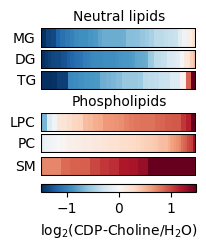

In [337]:
# Example: list of dataframes for each heatmap (replace with your actual dataframes)
heatmap_data_list = [
    data[data['class'] == 'MG'],
    data[data['class'] == 'DG'],
    data[data['class'] == 'TG'],
    data[data['class'] == 'SM'],
    data[data['class'] == 'LPC'],
    data[data['class'] == 'PC']
]

# Number of heatmaps
n_heatmaps = len(heatmap_data_list)

# Create a figure with n_heatmaps rows and 1 column
fig, axes = plt.subplots(nrows=n_heatmaps, ncols=1, figsize=(2, n_heatmaps * .3))

# If there's only one heatmap, ensure axes is iterable
if n_heatmaps == 1:
    axes = [axes]

# Loop over each dataframe and axis
for ax, df in zip(axes, heatmap_data_list):
    # Sort the data by the column of interest
    sorted_data = df[['log_ratio[s2-over-s1]']].sort_values(by='log_ratio[s2-over-s1]')
    # Transpose so the heatmap is horizontal (one row rather than one column)
    sorted_data = sorted_data.T
    
    # Plot the horizontal heatmap on the given axis
    im = sns.heatmap(sorted_data, annot=False, cmap='RdBu_r', vmin=-1.5, vmax=1.5,
                cbar_kws={'label': 'log_ratio[s2-over-s1]'}, ax=ax, cbar=False)
    
    # Set a title for the heatmap (displayed above each plot)
    ax.set_title('')
    ax.set_ylabel('')
    ax.set_xlabel('')
    # Optionally remove x-axis tick labels if they correspond to species names or similar unwanted labels
    ax.set_xticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylabel(df['class'][0], rotation=0, ha='right', va='center')
    
    rect = Rectangle((0, 0), 1, 1, transform=ax.transAxes,
                     fill=False, color="black", linewidth=1.5)
    ax.add_patch(rect)
    if df['class'][0] == 'MG':
        ax.set_title('Neutral lipids', fontsize=10)
    # if df['class'][0] == 'SM':
    #     ax.set_title('Phospholipids', fontsize=10)
    
plt.subplots_adjust(hspace=0.1)

if n_heatmaps >= 4:
    # Get the current position of the 4th subplot
    pos = axes[3].get_position()
    # Increase the vertical gap by shifting the 4th subplot downward.
    # For example, subtracting an extra 0.4 from the y0 position.
    new_pos = [pos.x0, pos.y0 - 0.4, pos.width, pos.height]
    axes[3].set_position(new_pos)

    axes[3].text(.5, 3.5, 'Phospholipids',fontsize=10,
                transform=axes[3].transAxes, ha='center', va='bottom')
        
    #axes[3].title.set_position([1.5,0])
#axes[3].set_title(titles[3], pad=20)
    
    # Option 2: Alternatively, directly set the title's y-coordinate
    #axes[3].title.set_y(2)

cbar = fig.colorbar(im.collections[0], ax=axes, orientation='horizontal', fraction=0.05, pad=0.05)
cbar.set_label('log$_{2}$(CDP-Choline/H$_{2}$O)')

plt.savefig('../../paper/main_plots/heatmap_choline_fold_change.png', dpi=300, bbox_inches='tight')

plt.show()



In [8]:
# Lipid categories
palette = {
    'Sphingolipids':'#1DC9A4',
    'Neutral lipids':'#E3120B',
    'Phospholipids':'#475ED1',
    'Fatty acyl and other lipids':'#F97A1F', 
    'Neutral glycerolipid':'#E3120B',	
    'Steroid':'#F9C31F'
}

/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_59479/2807573092.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data['p_value[s2-over-s1]']>0.05]['cat'] = 'other'
/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_59479/2807573092.py:12: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df[

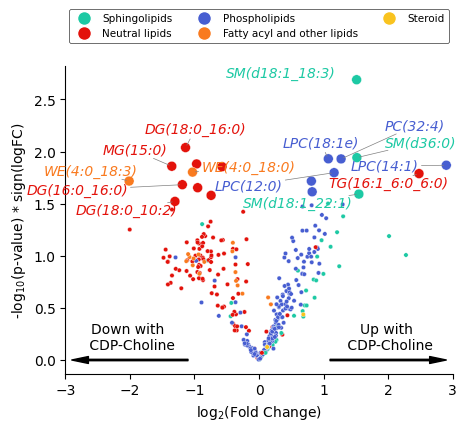

In [11]:
plt.figure(figsize=(5, 4))

# prep data
data[data['p_value[s2-over-s1]']>0.05]['cat'] = 'other'
bottom_genes = data.nsmallest(10, 'score')['name']
top_genes = data.nlargest(10, 'score')['name']
top_genes = np.concatenate([bottom_genes, top_genes])

data.loc[~data['name'].isin(top_genes), 'cat'] = 'other'

data['size'] = np.where(data['name'].isin(top_genes), 50, 10)
data['cat'][(data['log_ratio[s2-over-s1]']<0) & (data['p_value[s2-over-s1]']<0.05)] = 'down'
data['cat'][(data['log_ratio[s2-over-s1]']>0) & (data['p_value[s2-over-s1]']<0.05)] = 'up'
data['cat'][data['p_value[s2-over-s1]']>0.05] = 'other'
#palette = {'down': 'orange', 'up': 'purple', 'other': '#A7A9AC'}
sns.scatterplot(data=data, x='log_ratio[s2-over-s1]', y=-1*np.log10(data['p_value[s2-over-s1]']), hue='group', size='size', sizes=(10, 50), palette=palette)

# Label top genes
texts = []
for gene in top_genes:
    
    if (data.loc[gene, 'p_value[s2-over-s1]'] < 0.05) & (np.abs(data.loc[gene, 'log_ratio[s2-over-s1]']) > 1):
        #print(gene)
        color = palette[data.loc[gene, 'group']]
        txt = plt.text(data.loc[gene, 'log_ratio[s2-over-s1]'],
                       -1 * np.log10(data.loc[gene, 'p_value[s2-over-s1]']),
                       gene.split('+')[0], fontsize=10, ha='right', va='bottom', style='italic', color=color)
        texts.append(txt)

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='grey', lw=0.5))

sns.despine(top=True, right=True)
plt.xlabel('log$_{2}$(Fold Change)')
plt.ylabel('-log$_{10}$(p-value) * sign(logFC)')
plt.legend(bbox_to_anchor=(1.25, 0.5), loc='center left')

plt.annotate('', xy=(3,0), xytext=(1, 0),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5))
plt.text(2, .1, 'Up with \n CDP-Choline', ha='center', fontsize=10)

plt.annotate('', xy=(-3,0), xytext=(-1, 0),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5))
plt.text(-2, .1, 'Down with \n CDP-Choline', ha='center', fontsize=10)

plt.xlim(-3, 3)
plt.legend().remove()
plt.title('', fontsize=10)

labels = [
    'Sphingolipids', 
    'Neutral lipids', 
    'Phospholipids',
    'Fatty acyl and other lipids', 
    'Steroid'
]

handles = [
    Line2D([0], [0], marker='o', color='w', label=label,
           markerfacecolor=palette[label], markersize=10)
    for label in labels
]

legend = plt.legend(handles=handles, loc='upper center', bbox_to_anchor=(.5, 1.2), ncol=3, frameon=True, fontsize=7.5)
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(.5)

plt.savefig('../../paper/main_plots/volcano_all_species_choline.png', dpi=300, bbox_inches='tight')
plt.show()
